# ***ASSIGNMENT - 12***

## Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report)

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

## **Task 1. Exploratory Data Analysis (EDA):**

In [ ]:
# Loading the second sheet of the Document
data = pd.read_excel("glass.xlsx", sheet_name=1)

print("\nFirst 5 rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())

print("\nClass Distribution (Type):")
print(data["Type"].value_counts())


First 5 rows of the dataset:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: f

## **Task 2: Data Visualization:**

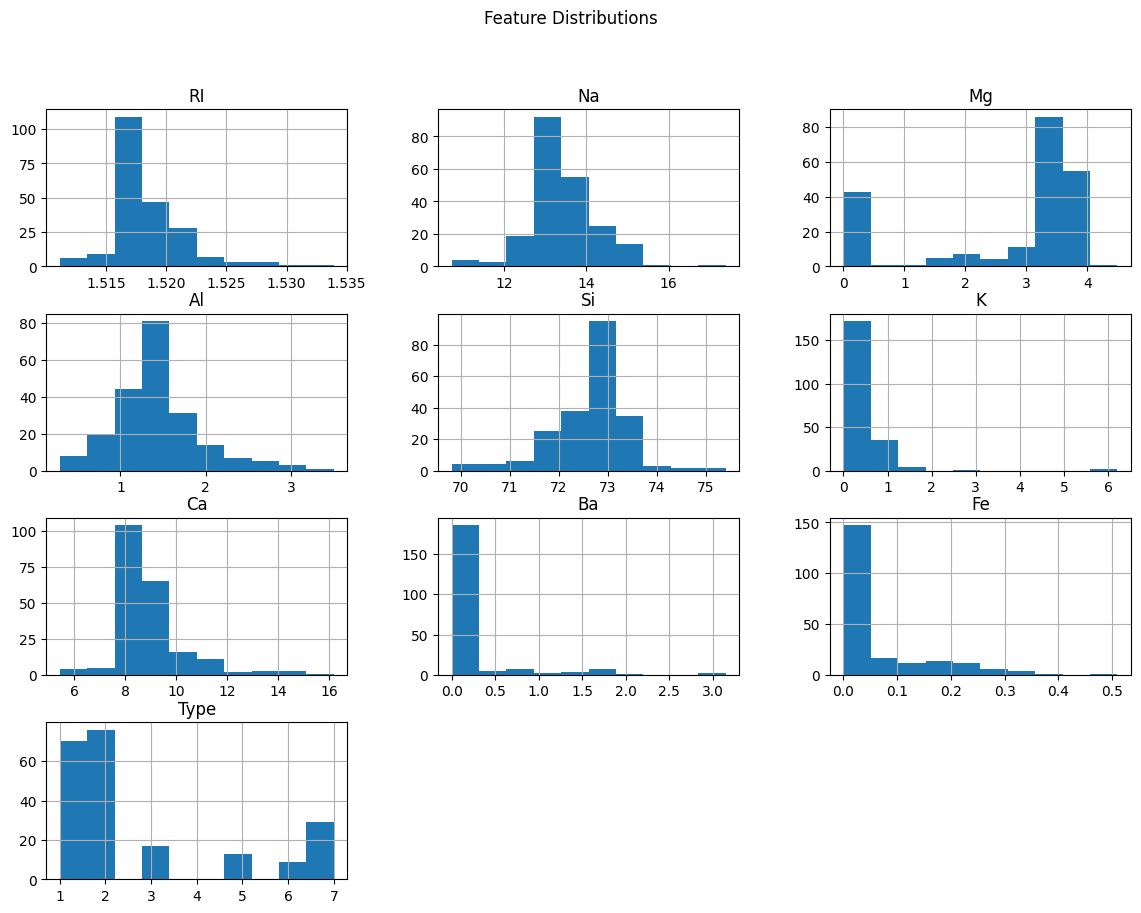

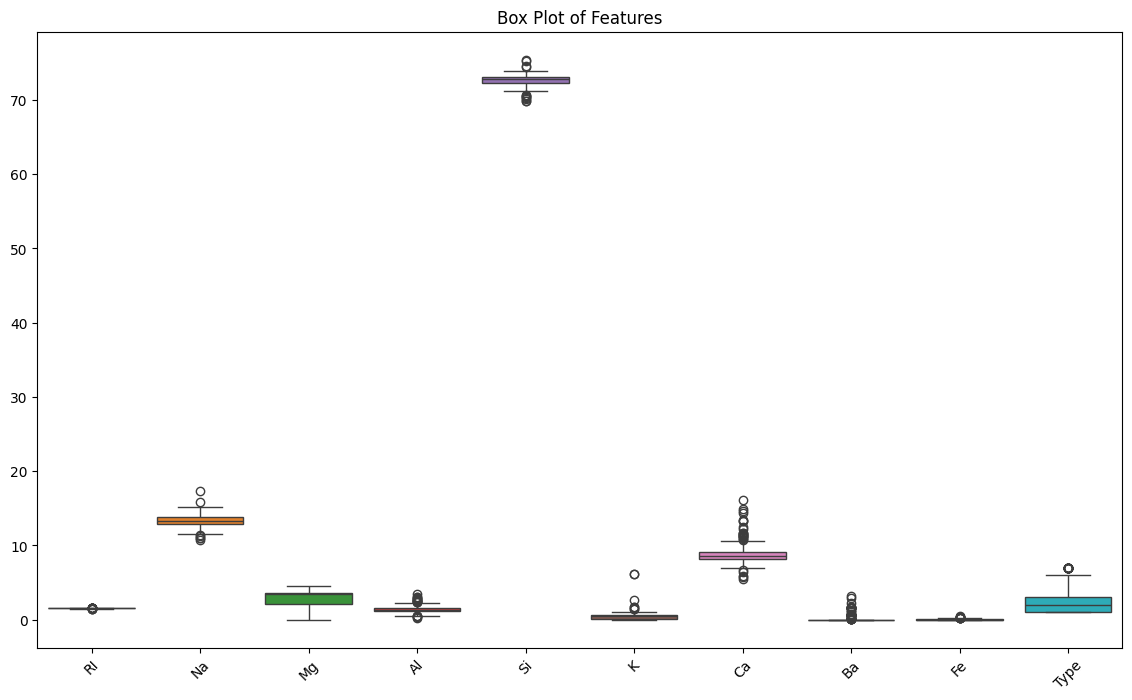

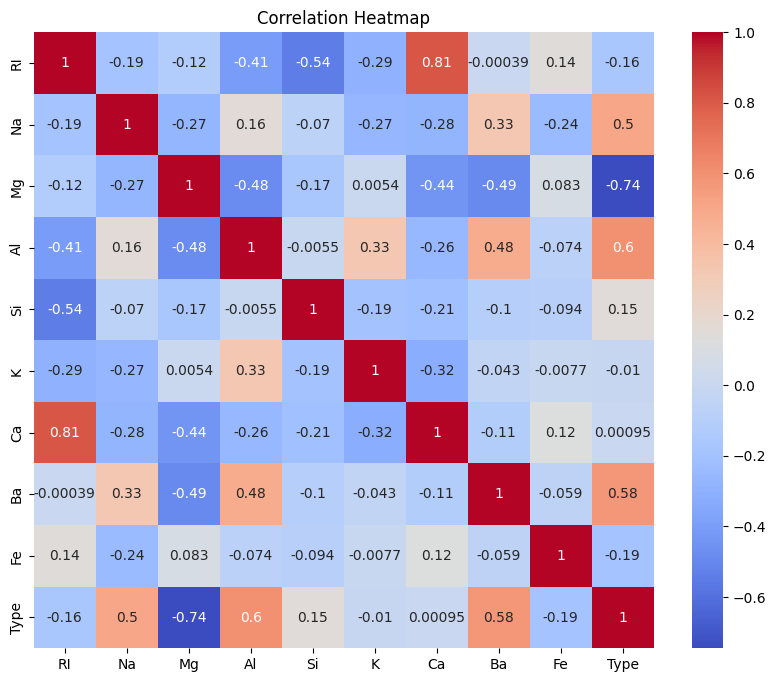

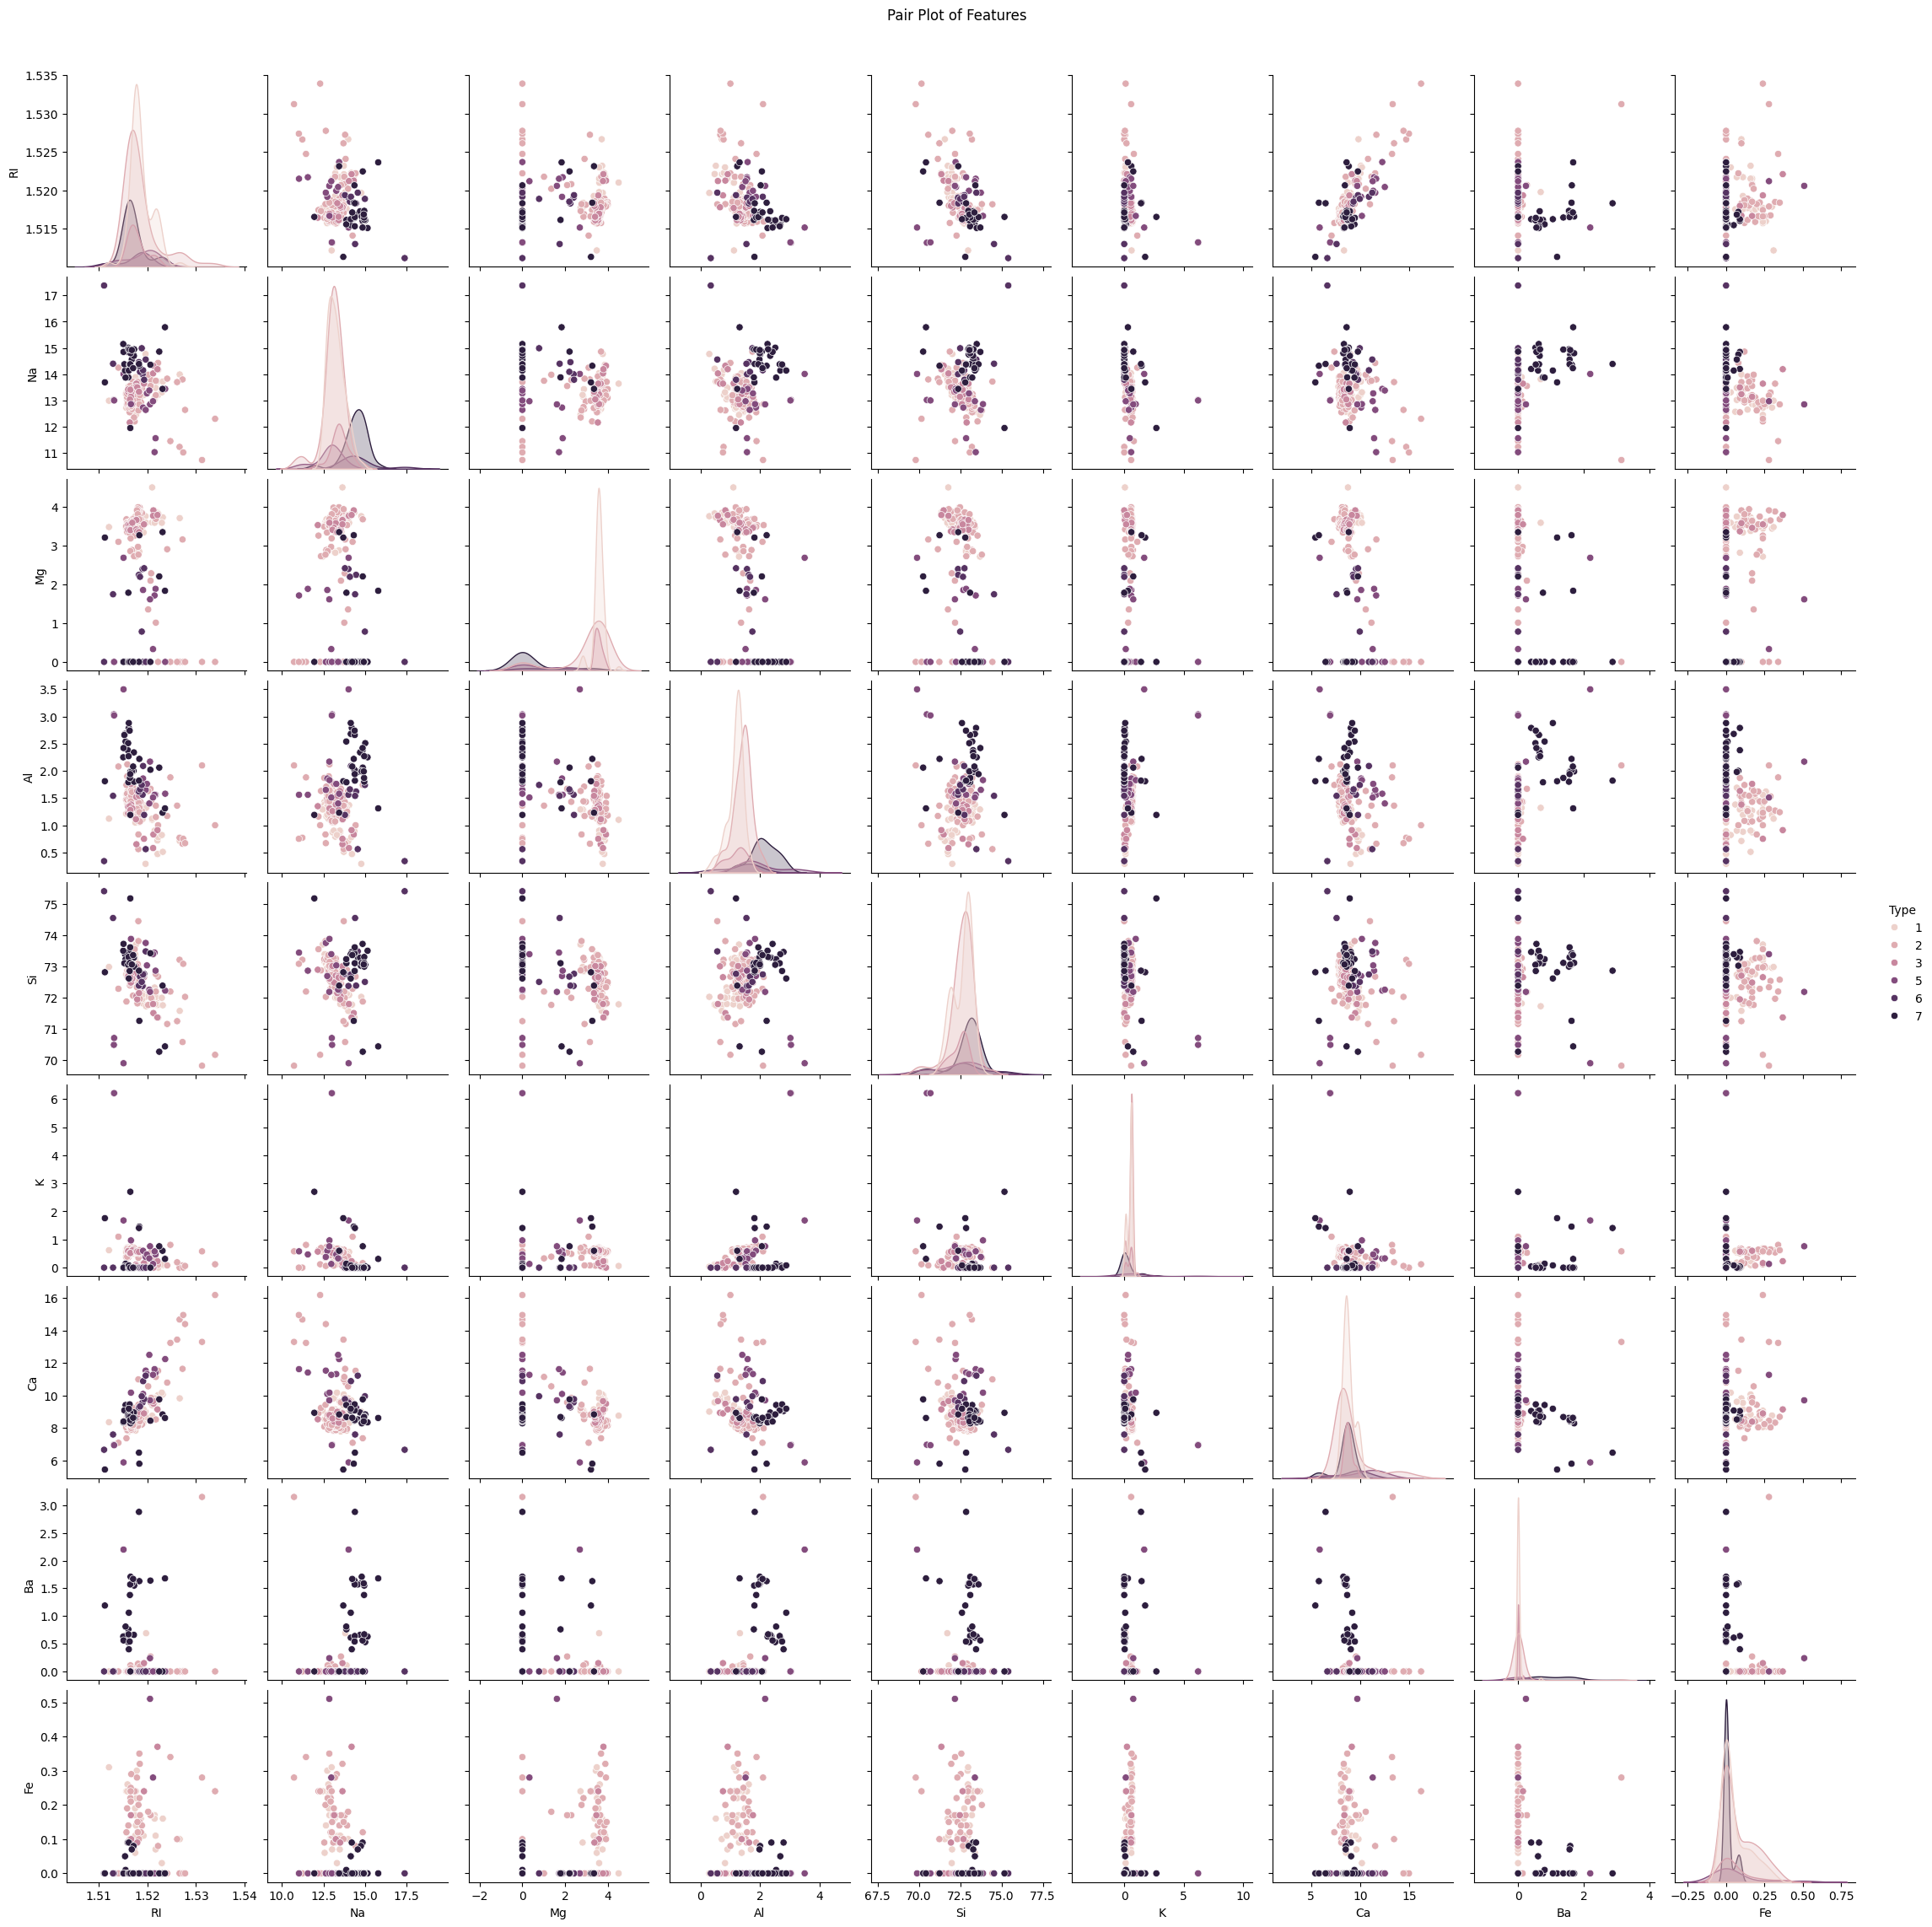

In [ ]:
# Histograms
data.hist(figsize=(14, 10))
plt.suptitle("Feature Distributions")
plt.show()

# Box plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("Box Plot of Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pair plot
sns.pairplot(data, hue="Type")
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

## **Task 3: Data Preprocessing**

In [ ]:
# 1. Handle Missing Values
# Glass dataset has no missing values

for col in data.columns:
    data[col].fillna(data[col].median(), inplace=True)

# 2. All columns are numerical → No encoding required

# 3. Feature Scaling & Handling Imbalanced Data

X = data.drop("Type", axis=1)
y = data["Type"]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("\nClass Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class Distribution After SMOTE:
Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


/tmp/ipython-input-803292515.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


## **Task 4: Random Forest Model Implementation**

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

# Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\nRandom Forest Performance:")
print(f"Accuracy  : {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision : {precision_score(y_test, rf_pred, average='weighted'):.4f}")
print(f"Recall    : {recall_score(y_test, rf_pred, average='weighted'):.4f}")
print(f"F1 Score  : {f1_score(y_test, rf_pred, average='weighted'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, rf_pred))


Random Forest Performance:
Accuracy  : 0.9130
Precision : 0.9166
Recall    : 0.9130
F1 Score  : 0.9140

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.87      0.81        15
           2       0.93      0.87      0.90        15
           3       0.93      0.87      0.90        15
           5       0.94      0.94      0.94        16
           6       1.00      1.00      1.00        16
           7       0.93      0.93      0.93        15

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92



## **Task 5: Bagging and Boosting Methods**

In [ ]:
# BAGGING:

bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42)

bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)

print("\nBagging Performance:")
print(f"Accuracy  : {accuracy_score(y_test, bagging_pred):.4f}")
print(f"Precision : {precision_score(y_test, bagging_pred, average='weighted'):.4f}")
print(f"Recall    : {recall_score(y_test, bagging_pred, average='weighted'):.4f}")
print(f"F1 Score  : {f1_score(y_test, bagging_pred, average='weighted'):.4f}")

# BOOSTING (AdaBoost):

boosting_model = AdaBoostClassifier(
    n_estimators=100,
    random_state=42)

boosting_model.fit(X_train, y_train)
boosting_pred = boosting_model.predict(X_test)

print("\nBoosting Performance:")
print(f"Accuracy  : {accuracy_score(y_test, boosting_pred):.4f}")
print(f"Precision : {precision_score(y_test, boosting_pred, average='weighted'):.4f}")
print(f"Recall    : {recall_score(y_test, boosting_pred, average='weighted'):.4f}")
print(f"F1 Score  : {f1_score(y_test, boosting_pred, average='weighted'):.4f}")


Bagging Performance:
Accuracy  : 0.8913
Precision : 0.8913
Recall    : 0.8913
F1 Score  : 0.8904

Boosting Performance:
Accuracy  : 0.5109
Precision : 0.5249
Recall    : 0.5109
F1 Score  : 0.4939


## **Additional Notes:**

### 1. Bagging vs Boosting:

Bagging (Bootstrap Aggregating):
- Builds multiple models independently using random samples
- Reduces variance
- Suitable for high-variance models like decision trees

Boosting:
- Builds models sequentially
- Focuses on correcting previous errors
- Reduces bias and improves accuracy

Differences between Bagging and Boosting:
- Bagging models are independent
- Boosting models are dependent and sequential

### 2. Handling Imbalanced Data:

Common techniques:
- Oversampling (SMOTE)
- Undersampling
- Class weights
- Ensemble methods

In this assignment:
- SMOTE is used to balance class distribution
- This improves minority class prediction